# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

Draw a dispersion diagram (scatter plot) for the data.

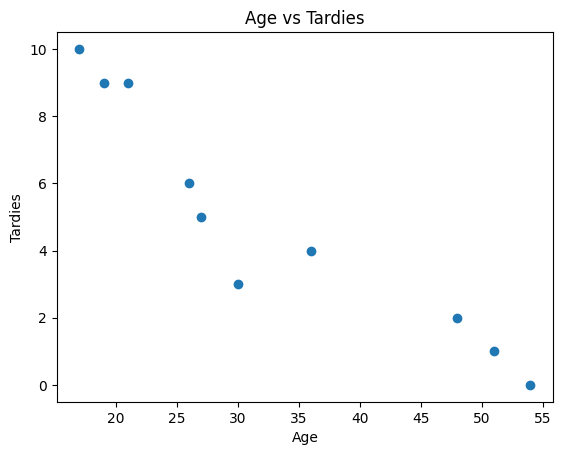

In [1]:
import pandas as pd # primero importamos
import matplotlib.pyplot as plt # primero importamos

# Creamos listas para cada variable
age_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
tardies_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

# Creamos la DF
student_data = pd.DataFrame({'X': age_values, 'Y': tardies_values})

# Para mostar la gráfica
plt.scatter(student_data['X'], student_data['Y'])

#añadimos que es lo que queremos que exponga la gráfica
plt.xlabel('Age') #El eje X queremos que exponga la edad
plt.ylabel('Tardies') #en el eje Y la veces que han llegado tarde
plt.title('Age vs Tardies') #añadimos un título a la gráfica

# mostrar la gráfica
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?



There seems to be a negative trend: As the age of students increases, the number of tardies tends to decrease. In other words, older students appear to be less frequently late to class compared to younger students. Based on these observations, we can hypothesize that there is a negative correlation between a student's age and the number of tardies they have

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [2]:
student_data = pd.DataFrame({'Age': age_values, 'Tardies': tardies_values})

In [3]:
# Your response here.
#correlation:

correlation = student_data['Age'].corr(student_data['Tardies'])

#covariance:

covariance = student_data['Age'].cov(student_data['Tardies'])


In [4]:
correlation 


-0.9391626886887122

In [5]:
covariance

-45.56666666666666

The negative covariance and correlation values in this case suggest a negative linear relationship between student age and the number of delays. This is consistent with the earlier observation from the scatter plot that older students tend to have fewer delays.  In this case, since the correlation is almost equal to -1 it indicates a very strong negative linear relationship between age and tardiness. 

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here.

X = student_data[['Age']]
y = student_data[['Tardies']]



In [7]:
from sklearn import linear_model

In [8]:
model = linear_model.LinearRegression()

In [9]:
model.fit(X, y)


LinearRegression()

In [10]:
# We define 'Age' as our predictor variable (X) and 'Tardies' as our outcome variable (y).
# We create a simple linear regression model using LinearRegression from scikit-learn
# We fit the model to our data to estimate the coefficients (slope and intercept) of the regression line
# In this case, the outcome variable is the 'Tardies,' and we are using simple linear regression to model the relationship between a student's age and the number of tardies. The regression equation will be of the form:

# Tardies = Intercept + Slope * Age . The "Slope" (Coefficient) tells us how much the number of tardies changes for each unit increase in age, and the "Intercept" represents the expected number of tardies when the age is zero.

Plot your regression model on your scatter plot.

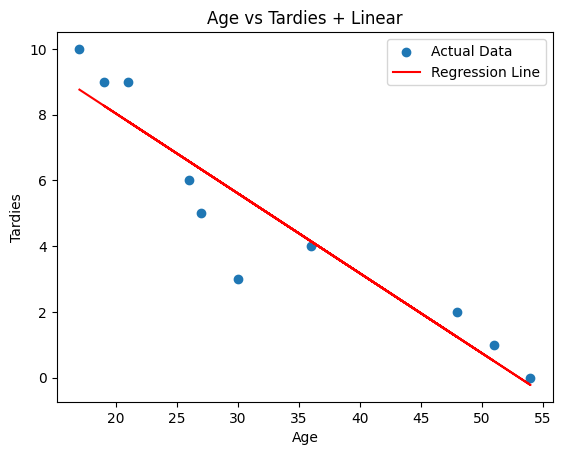

In [11]:
# generamos un modelo

predictions = model.predict(X)

# Grafica
plt.scatter(X, y, label='Actual Data')

# mostramos la regression
plt.plot(X, predictions, color='red', label='Regression Line')

# Añadimos la leyenda
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Age vs Tardies + Linear')
plt.legend()

# muestralo
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [12]:
r_squared = model.score(X, y)

In [13]:
r_squared

0.8820265558250109

# Your response here. 
 R-squared of 0.871 indicates that approximately 87.1% of the variance in tardiness can be explained by the linear relationship with age. This suggests a strong linear relationship between age and tardiness.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [14]:
# Import any libraries you may need & the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [15]:
# cargar la data
data = pd.read_csv('vehicles.csv')

In [16]:
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [17]:
# vairables de interes
variables_of_interest = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']


In [18]:
# creamos el DF 
df = data[variables_of_interest]

In [19]:
#calculamos la correlacion
correlation_matrix = df.corr()
correlations_with_outcome = correlation_matrix['CO2 Emission Grams/Mile']
print(correlations_with_outcome)

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64



The variable that is most important in determining CO2 emissions is likely 'Fuel Barrels/Year' because it has the highest positive correlation with 'CO2 Emission Grams/Mile'. A higher value of 'Fuel Barrels/Year' is associated with higher CO2 emissions.

The variable that provides the least amount of helpful information for determining CO2 emissions is 'Year' as it has a relatively low correlation with 'CO2 Emission Grams/Mile'. This suggests that the model year of the vehicle may not be a strong predictor of CO2 emissions.


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [20]:
#feautres 

X = data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = data['CO2 Emission Grams/Mile']



In [21]:
model = LinearRegression()

In [22]:
model.fit(X, y)

LinearRegression()

In [23]:
coefficients = model.coef_
intercept = model.intercept_

In [24]:
coefficients

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

In [25]:
intercept 

769.8882836465675

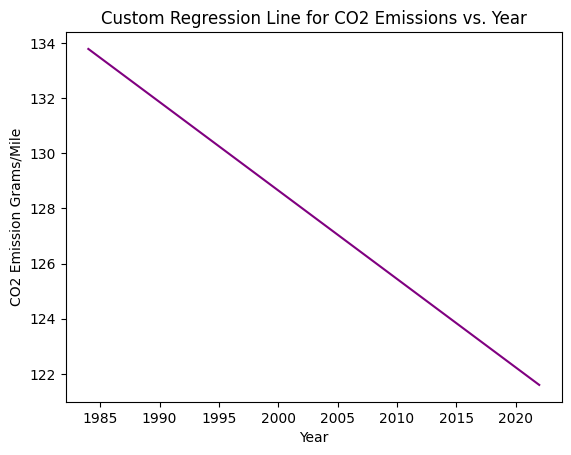

In [26]:

# sabiendo ya estos datos
intercept = 769.8882836465704
coefficients = np.array([-0.32061673, 1.87879976, 19.05292507, -3.04039938, 0.03230948])

# cramos el rango de años
years = np.arange(1984, 2023, 1)  

# Generamos lo valores predictivos
predicted_values = intercept + years * coefficients[0]

# imprimir la regresion
plt.plot(years, predicted_values, c='purple', label='Custom Regression Line')

# le ponemos nombre
plt.xlabel('Year')
plt.ylabel('CO2 Emission Grams/Mile')
plt.title('Custom Regression Line for CO2 Emissions vs. Year')


# lo mostramos
plt.show()

it is clear that there is a precondition where the more we advance in years, the less Co2 we will emit


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [27]:
r_squared = model.score(X, y)
r_squared 

0.9808734920269122

Since we have an r_squared of 0.98 which is a very high number, we see that the CO2 pollution vairance over the years has a very strong relationship. So we can be sure that the prediction with the model is OK.

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [28]:
# Your code here.
data = {'X (People Invited)': [1, 3, 4, 6, 8, 9, 11, 14],
        'Y (People Attended)': [1, 2, 4, 4, 5, 7, 8, 13]}

df = pd.DataFrame(data)

In [29]:
print(df)


   X (People Invited)  Y (People Attended)
0                   1                    1
1                   3                    2
2                   4                    4
3                   6                    4
4                   8                    5
5                   9                    7
6                  11                    8
7                  14                   13


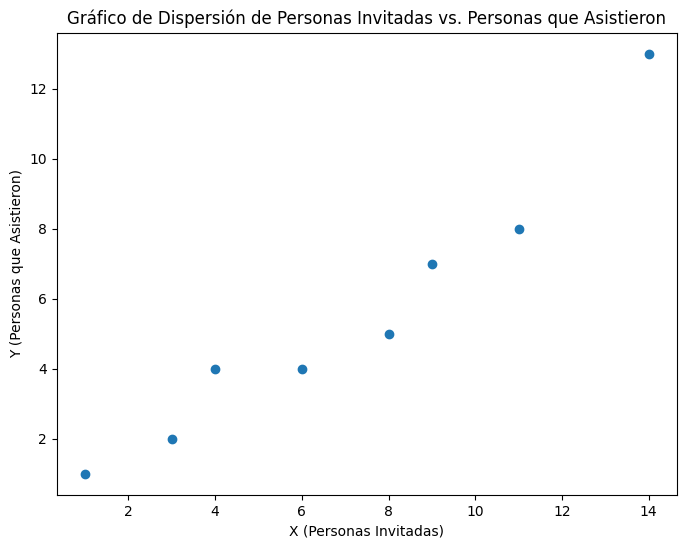

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(df['X (People Invited)'], df['Y (People Attended)'])
plt.title('Gráfico de Dispersión de Personas Invitadas vs. Personas que Asistieron')
plt.xlabel('X (Personas Invitadas)')
plt.ylabel('Y (Personas que Asistieron)')
plt.show()

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [31]:
from scipy.stats import linregress

In [32]:
# Your code here.

slope, intercept, r_value, p_value, std_err = linregress(df['X (People Invited)'], df['Y (People Attended)'])


In [33]:
regression_line = slope * df['X (People Invited)'] + intercept


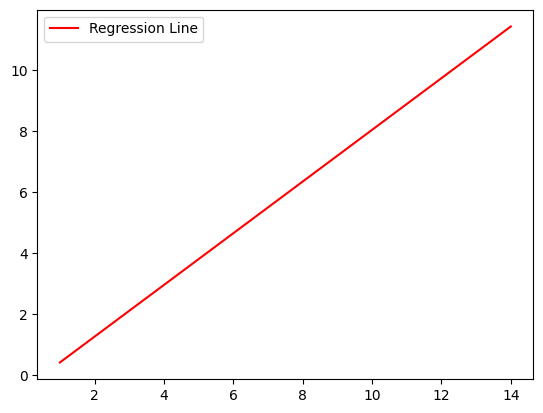

In [34]:
plt.plot(df['X (People Invited)'], regression_line, color='red', label='Regression Line')
plt.legend()
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [35]:
# Your response here. 
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared Value: {r_value**2}")



Slope (Coefficient): 0.8484848484848485
Intercept: -0.43939393939393945
R-squared Value: 0.9316696375519905


Slope (Coefficient): tells us that, on average, for each additional person invited, there is an increase in the number of attendees of approximately the value of the slope.

Intercept: may not have a practical interpretation, since it is not possible to have zero attendees when no one is invited.

R-squared value: tells us how well the linear regression model fits the data points. If it is very close to 1, we can say that the prediction model is good.




Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

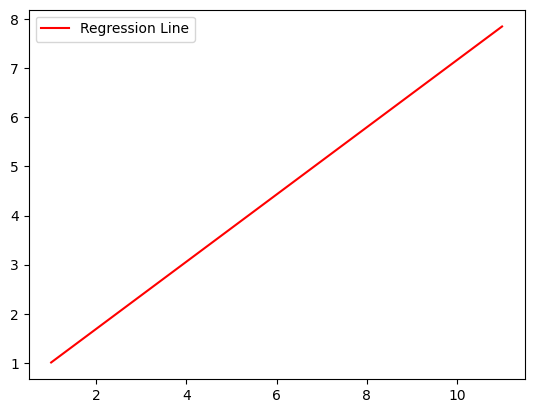

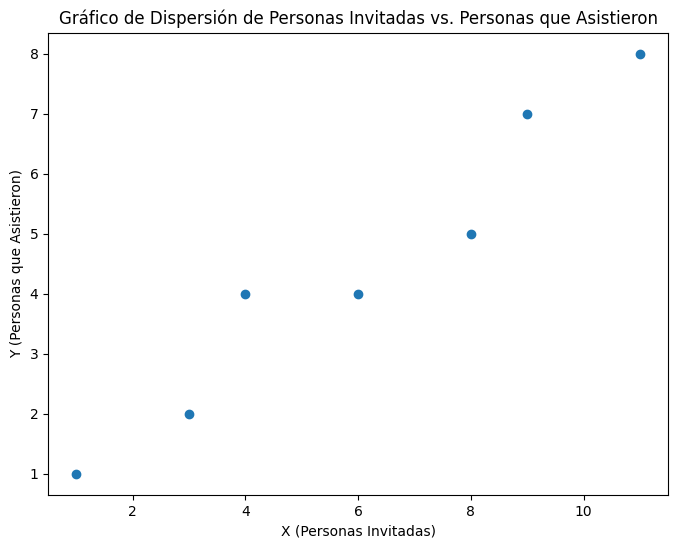

In [36]:
data = {'X (People Invited)': [1, 3, 4, 6, 8, 9, 11],
        'Y (People Attended)': [1, 2, 4, 4, 5, 7, 8]}

df = pd.DataFrame(data)

slope, intercept, r_value, p_value, std_err = linregress(df['X (People Invited)'], df['Y (People Attended)'])

regression_line = slope * df['X (People Invited)'] + intercept

plt.plot(df['X (People Invited)'], regression_line, color='red', label='Regression Line')
plt.legend()
plt.show()



plt.figure(figsize=(8, 6))
plt.scatter(df['X (People Invited)'], df['Y (People Attended)'])
plt.title('Gráfico de Dispersión de Personas Invitadas vs. Personas que Asistieron')
plt.xlabel('X (Personas Invitadas)')
plt.ylabel('Y (Personas que Asistieron)')
plt.show()

In [37]:
print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared Value: {r_value**2}")


Slope (Coefficient): 0.6842105263157895
Intercept: 0.32330827067669166
R-squared Value: 0.9433811802232854


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

Slope Coefficient: The slope coefficient in Model 1 (0.8485) is higher than in Model 2 (0.6842). This means that, in Model 1, a unit increase in the independent variable translates into a larger increase in the dependent variable compared to Model 2. In other words, Model 1 has a steeper slope.

Independent Term (Intercept): The independent term (intercept) in Model 1 is negative (-0.4394), while in Model 2 it is positive (0.3233). The independent term represents the expected value of the dependent variable when the independent variable is equal to zero. In Model 1, this implies that when the independent variable is zero, the dependent variable is expected to be negative. In Model 2, the dependent variable is expected to be positive when the independent variable is zero.

R-squared value (R-squared): The R-squared value in Model 2 (0.9434) is slightly higher than in Model 1 (0.9317). The R-squared value measures the goodness-of-fit of the model and represents the proportion of the variance in the dependent variable that is explained by the independent variable. An R-squared value closer to 1 indicates a better fit of the model to the data. In this case, Model 2 has a slightly better fit.


